In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [27]:
iname = '26KN4.jpg'
img = cv2.imread(iname)
print(img.shape)
h, w = img.shape[:2]
bbox = np.zeros(shape=(h, w))
bbox[200:500, 220:770] = 255
margin = min(w, h)//5

(1750, 951, 3)


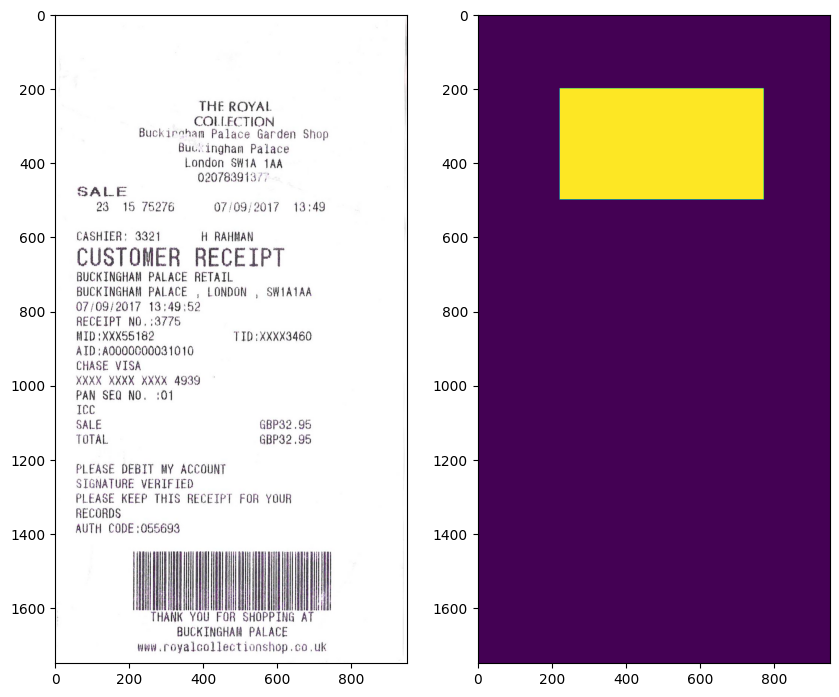

In [28]:
plt.subplots(1, 2, figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(bbox)
plt.show()

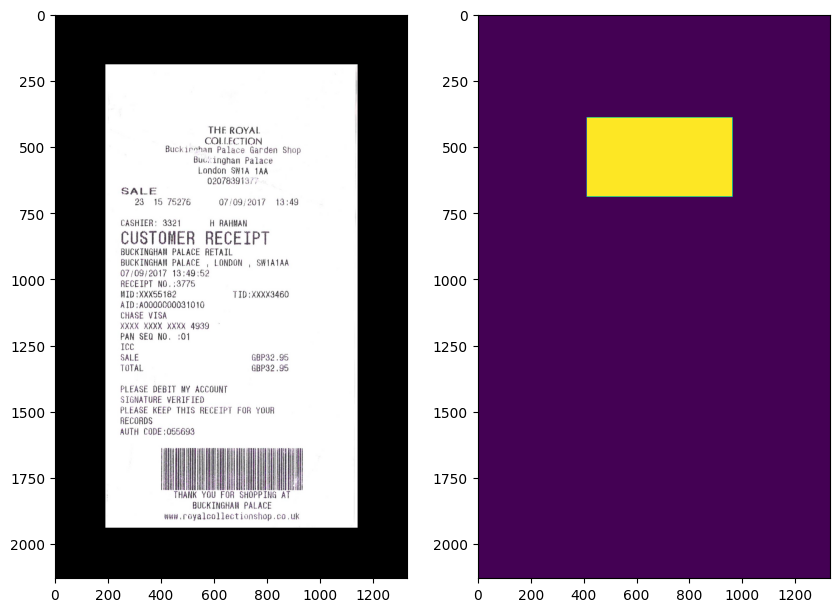

In [29]:
img = cv2.copyMakeBorder(img, margin, margin, margin, margin, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
bbox = cv2.copyMakeBorder(bbox, margin, margin, margin, margin, borderType=cv2.BORDER_CONSTANT, value=0)
plt.subplots(1, 2, figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(bbox)
plt.show()

In [30]:
h, w = img.shape[:2]
x, y = np.meshgrid(np.arange(w), np.arange(h))
x.shape, y.shape

((2130, 1331), (2130, 1331))

In [31]:
# select random vertex p on the mesh
p1 = np.random.randint(margin, w-margin), np.random.randint(margin, h-margin)
print('p1:', p1)

p1: (337, 1408)


In [32]:
# randomly generate a vector v = [vx, vy], where vx E [-0.5w, 0.5w], vy E [-0.5h, 0.5h]
v = np.random.uniform(-1, 1, size=2)*margin
print('v:', v)

v: [-65.23689154 180.1363604 ]


In [33]:
p2 = p1+v
print('p2:', p2)

p2: [ 271.76310846 1588.1363604 ]


In [34]:
d = np.cross(p2-p1, np.stack([x, y], axis=2) - p1) / np.linalg.norm(p2-p1)
d = np.abs(d)
# normalize d to [0, 1]
d = d / d.max()

Text(0.5, 1.0, 'Distance Matrix Between Each\n Vertices and The Line (p1, p2)')

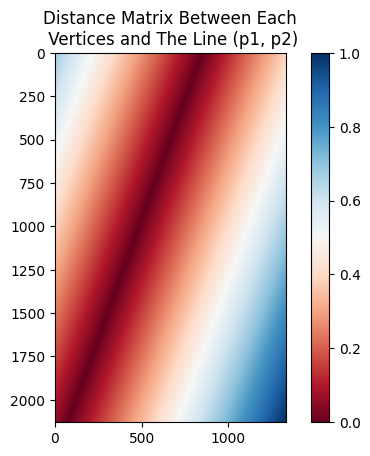

In [35]:
# plot the d, lower value have blue color, higher value have red color
plt.imshow(d, cmap='RdBu')
plt.colorbar()
plt.title('Distance Matrix Between Each\n Vertices and The Line (p1, p2)')

In [36]:
alpha = np.percentile(d, 50)
alpha

0.2859343511570503

In [53]:
alpha = np.percentile(d, 75)
# weight = alpha / (d + alpha)
weight = 1 - d ** alpha
print(weight.shape, weight.min(), weight.max())

(2130, 1331) 0.0 1.0


Text(0.5, 1.0, 'Weight Matrix')

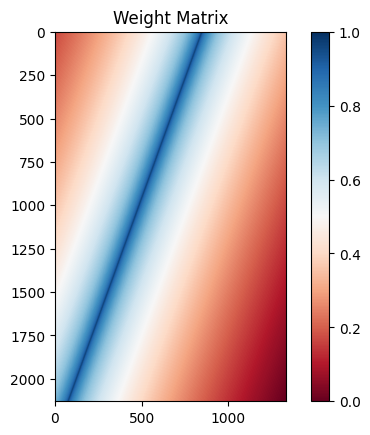

In [54]:
# plot the weight, lower value have blue color, higher value have red color
plt.imshow(weight, cmap='RdBu')
# show the legend
plt.colorbar()
plt.title('Weight Matrix')

In [55]:
meshx, meshy = x - weight * v[0], y - weight * v[1]
meshx.shape, meshy.shape

((2130, 1331), (2130, 1331))

In [56]:
print('p1:', p1)
print('p2:', p2)
print('v:', v)
# plt.scatter(meshx, meshy, c=np.arange(w*h))
# plt.contourf(meshx, meshy, np.arange(w*h), cmap='RdBu')
# plt.show()

p1: (337, 1408)
p2: [ 271.76310846 1588.1363604 ]
v: [-65.23689154 180.1363604 ]


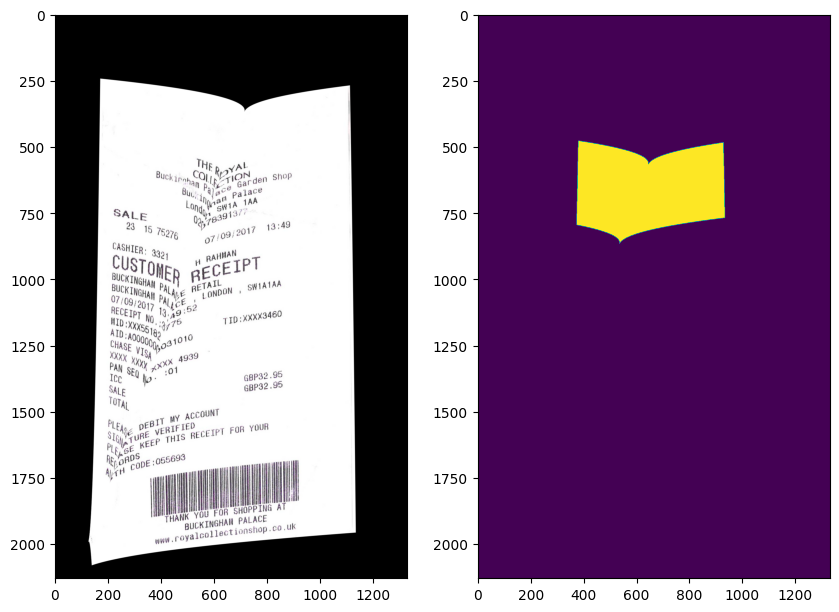

In [57]:
dst = cv2.remap(img, meshx.astype(np.float32), meshy.astype(np.float32), cv2.INTER_LINEAR)
dst2 = cv2.remap(bbox, meshx.astype(np.float32), meshy.astype(np.float32), cv2.INTER_NEAREST)
plt.subplots(1, 2, figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(dst)
plt.subplot(1, 2, 2)
plt.imshow(dst2)
plt.show()

In [58]:
nonzero = np.any(dst, axis=2)
minx, maxx = np.where(nonzero.any(axis=0))[0][[0, -1]]
miny, maxy = np.where(nonzero.any(axis=1))[0][[0, -1]]
dst = dst[miny:maxy, minx:maxx]
dst2 = dst2[miny:maxy, minx:maxx]

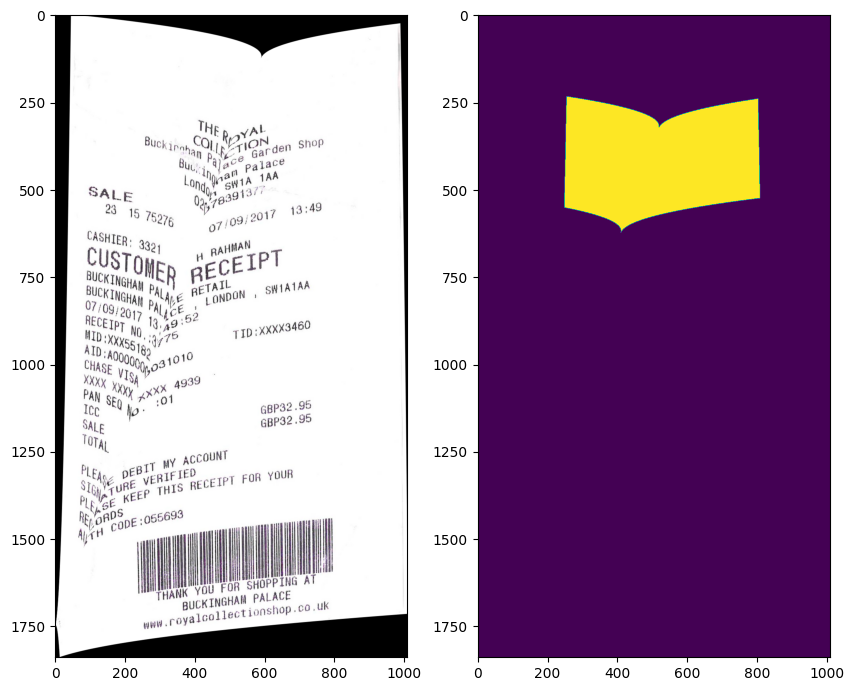

In [59]:
plt.subplots(1, 2, figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(dst)
plt.subplot(1, 2, 2)
plt.imshow(dst2)
plt.show()

247 236 805 624


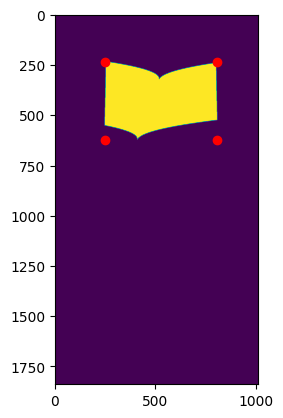

In [60]:
minx, maxx = np.where(dst2.any(axis=0))[0][[0, -1]]
miny, maxy = np.where(dst2.any(axis=1))[0][[0, -1]]
print(minx, miny, maxx, maxy)
# plot minx, miny, maxx, maxy
plt.imshow(dst2)
plt.scatter([minx, maxx, minx, maxx], [miny, miny, maxy, maxy], c='r')
plt.show()